# STEP 1

In [261]:
import pandas as pd
import matplotlib.pyplot as plt

In [262]:
data = pd.read_csv('dataset.csv')
data.head()

,f1,f2,f3,f4,f5,f6,f7,target
0,6,148,72,35,0,33.6,0.627,1
1,1,85,66,29,0,26.6,0.351,0
2,8,183,64,0,0,23.3,0.672,1
3,1,89,66,23,94,28.1,0.167,0
4,0,137,40,35,168,43.1,2.288,1


In [263]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 766 entries, 0 to 765
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   f1      766 non-null    object
 1   f2      766 non-null    object
 2   f3      766 non-null    int64 
 3   f4      766 non-null    object
 4   f5      766 non-null    object
 5   f6      766 non-null    object
 6   f7      766 non-null    object
 7   target  766 non-null    int64 
dtypes: int64(2), object(6)
memory usage: 48.0+ KB


In [264]:
data['f1'] = pd.to_numeric(data['f1'], errors='coerce')
data['f2'] = pd.to_numeric(data['f2'], errors='coerce')
data['f3'] = pd.to_numeric(data['f3'], errors='coerce')
data['f4'] = pd.to_numeric(data['f4'], errors='coerce')
data['f5'] = pd.to_numeric(data['f5'], errors='coerce')
data['f6'] = pd.to_numeric(data['f6'], errors='coerce')
data['f7'] = pd.to_numeric(data['f7'], errors='coerce')

In [265]:
data = data.dropna()

In [266]:
data.shape

(760, 8)

In [267]:
data.describe()

,f1,f2,f3,f4,f5,f6,f7,target
count,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000
mean,3.834211,120.969737,69.119737,20.507895,80.234211,31.998684,0.473250,0.350000
std,3.364762,32.023301,19.446088,15.958029,115.581444,7.899724,0.332277,0.477284
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.300000,0.243750,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.000000,0.375500,0.000000
75%,6.000000,141.000000,80.000000,32.000000,128.250000,36.600000,0.627500,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,1.000000


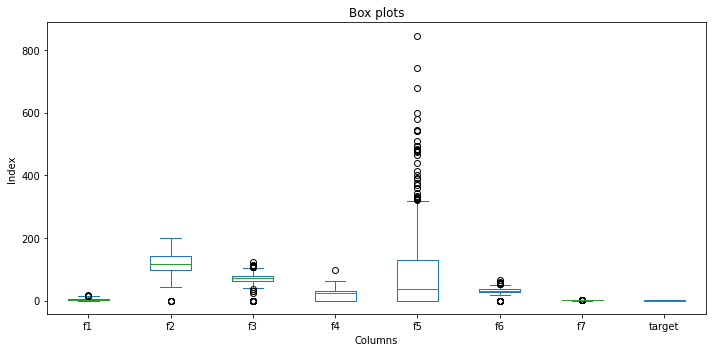

In [268]:
data.plot.box(figsize=(10,5))
plt.xlabel("Columns")
plt.ylabel("Index")
plt.title("Box plots")
plt.tight_layout()
plt.show()

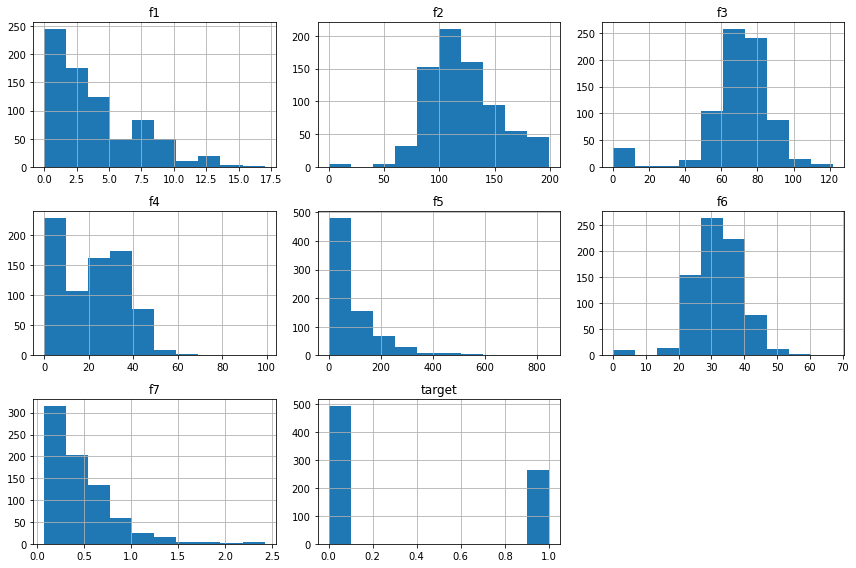

In [269]:
data.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

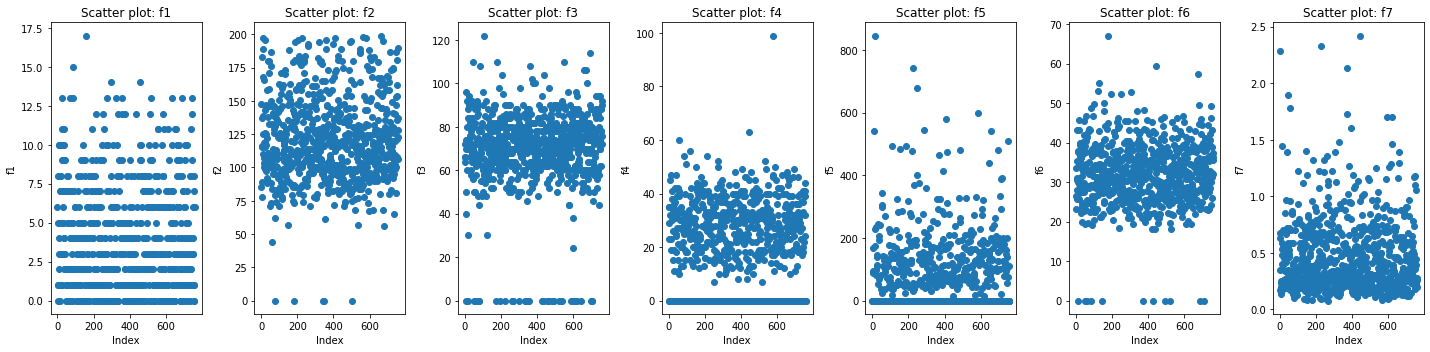

In [270]:
fig, axes = plt.subplots(1, data.columns.__len__()-1, figsize=(20, 5))

for i, col in enumerate(data.columns):
    if col != 'target':
        axes[i].scatter(data.index, data[col])
        axes[i].set_xlabel('Index')
        axes[i].set_ylabel(col)
        axes[i].set_title(f'Scatter plot: {col}')

plt.tight_layout()
plt.show()

In [271]:
# Detecting outliers
# Based on the above visualizations we print number of outliers
print(f"Number of outliers in f1 =",data[data['f1'] > 13]['f1'].__len__())
print(f"Number of outliers in f2 =",data[data['f2'] < 50]['f2'].__len__())
print(f"Number of outliers in f3 =",data[(data['f3'] < 40) | (data['f3'] > 100)].__len__())
print(f"Number of outliers in f4 =",data[data['f4'] > 55]['f4'].__len__())
print(f"Number of outliers in f5 =",data[data['f5'] > 400]['f5'].__len__())
print(f"Number of outliers in f6 =",data[(data['f6'] < 5) | (data['f6'] > 50)].__len__())
print(f"Number of outliers in f7 =",data[data['f7'] > 1.5]['f7'].__len__())

Number of outliers in f1 = 4
Number of outliers in f2 = 6
Number of outliers in f3 = 52
Number of outliers in f4 = 4
Number of outliers in f5 = 20
Number of outliers in f6 = 19
Number of outliers in f7 = 10


In [272]:
# Removing Outliers
data = data[data['f1'] < 13]
data = data[data['f2'] > 50]
data = data[data['f3'].between(40,100, inclusive='both')]
data = data[data['f4'] < 55]
data = data[data['f5'] < 400]
data = data[data['f6'].between(5,50, inclusive='both')]
data = data[data['f7'] < 1.5]

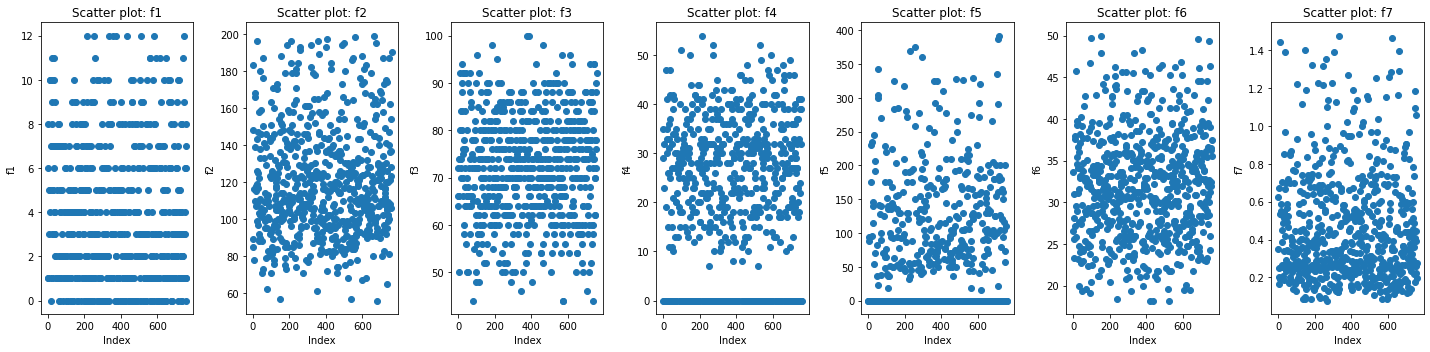

In [273]:
fig, axes = plt.subplots(1, data.columns.__len__()-1, figsize=(20, 5))

for i, col in enumerate(data.columns):
    if col != 'target':
        axes[i].scatter(data.index, data[col])
        axes[i].set_xlabel('Index')
        axes[i].set_ylabel(col)
        axes[i].set_title(f'Scatter plot: {col}')

plt.tight_layout()
plt.show()

In [274]:
# Normalization
# Normalization is needed in all features as the scale between column varies a lot
for col in data.columns:
    if col != 'target':
        data[col] = ((data[col] - data[col].min())/(data[col].max()-data[col].min())).round(2)

In [275]:
data.describe()

,f1,f2,f3,f4,f5,f6,f7,target
count,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000
mean,0.309679,0.449266,0.498807,0.383654,0.184664,0.433502,0.272278,0.325688
std,0.258821,0.208117,0.195607,0.281404,0.227177,0.201435,0.206465,0.468990
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.080000,0.300000,0.360000,0.000000,0.000000,0.290000,0.120000,0.000000
50%,0.250000,0.410000,0.500000,0.430000,0.110000,0.430000,0.210000,0.000000
75%,0.500000,0.577500,0.640000,0.590000,0.320000,0.560000,0.380000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [276]:
data.to_csv('./datasets_processed/datasetProcessed.csv', index=False)

# STEP 2

In [277]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
import torch
import torch.nn as nn
import torch.optim as optim
import torchinfo
import time
from torchmetrics.classification import BinaryAccuracy
from torchmetrics.classification import BinaryConfusionMatrix
from torchmetrics.classification import BinaryROC

In [278]:
dataPost = pd.read_csv('./datasets_processed/datasetProcessed.csv')
dataPost.head()

,f1,f2,f3,f4,f5,f6,f7,target
0,0.50,0.64,0.50,0.65,0.00,0.48,0.39,1
1,0.08,0.20,0.39,0.54,0.00,0.26,0.20,0
2,0.67,0.89,0.36,0.00,0.00,0.16,0.42,1
3,0.08,0.23,0.39,0.43,0.24,0.31,0.06,0
4,0.42,0.42,0.54,0.00,0.00,0.23,0.09,0


In [279]:
dataPost.shape

(654, 8)

In [280]:
X = dataPost.iloc[:, :-1] #Features
y = dataPost.iloc[:, -1] #Target

In [281]:
# Dataset split into training, validation, and testing sets (80:10:10)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [282]:
print(f"The shape of X_train is =", X_train.shape)
print(f"The shape of X_valid is =", X_valid.shape)
print(f"The shape of X_test is =", X_test.shape)
print(f"The shape of y_train is =", y_train.shape)
print(f"The shape of y_valid is =", y_valid.shape)
print(f"The shape of y_test is =", y_test.shape)

The shape of X_train is = (523, 7)
The shape of X_valid is = (65, 7)
The shape of X_test is = (66, 7)
The shape of y_train is = (523,)
The shape of y_valid is = (65,)
The shape of y_test is = (66,)


In [283]:
# Pandas dataframes to pyTorch tensors
X_train_tensor, X_valid_tensor, X_test_tensor = torch.Tensor(X_train.values), torch.Tensor(X_valid.values), torch.Tensor(X_test.values)
y_train_tensor, y_valid_tensor, y_test_tensor = torch.Tensor(y_train.values).unsqueeze(1), torch.Tensor(y_valid.values).unsqueeze(1), torch.Tensor(y_test.values).unsqueeze(1)

In [401]:
class NeuralNetwork(nn.Module):
    def __init__(self, dropout, activationFunc):
        super().__init__()
        self.linear = nn.Sequential(
            nn.Linear(7, 128),
            activationFunc,
            nn.Dropout(dropout),
            nn.Linear(128, 64),
            activationFunc,
            nn.Dropout(dropout),
            nn.Linear(64, 1)
        )
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.linear(x)
        x = self.sigmoid(x)
        return x

In [438]:
model = NeuralNetwork(dropout=0.2, activationFunc=nn.ELU())
print(model)

NeuralNetwork(
  (linear): Sequential(
    (0): Linear(in_features=7, out_features=128, bias=True)
    (1): ELU(alpha=1.0)
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=128, out_features=64, bias=True)
    (4): ELU(alpha=1.0)
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=64, out_features=1, bias=True)
  )
  (sigmoid): Sigmoid()
)


In [403]:
# Torchinfo Summary
torchinfoSummary = torchinfo.summary(model, input_size=(1,7)) #batch size= 1 and input size= 7
print(torchinfoSummary)

Layer (type:depth-idx)                   Output Shape              Param #
NeuralNetwork                            [1, 1]                    --
├─Sequential: 1-1                        [1, 1]                    --
│    └─Linear: 2-1                       [1, 128]                  1,024
│    └─ELU: 2-2                          [1, 128]                  --
│    └─Dropout: 2-3                      [1, 128]                  --
│    └─Linear: 2-4                       [1, 64]                   8,256
│    └─ELU: 2-5                          [1, 64]                   --
│    └─Dropout: 2-6                      [1, 64]                   --
│    └─Linear: 2-7                       [1, 1]                    65
├─Sigmoid: 1-2                           [1, 1]                    --
Total params: 9,345
Trainable params: 9,345
Non-trainable params: 0
Total mult-adds (M): 0.01
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.04
Estimated Total Size (MB): 0.04


## Model Training

In [404]:
# Model Training
def modelTraining(epochs, batchSize, criterion, optimizer, model):
    # Start time
    startTime = time.time()

    training_loss_plt_arr = []
    validation_loss_plt_arr = []
    testing_loss_plt_arr = []

    # Training loop
    for epoch in range(epochs):
        # Set model to training mode
        model.train()
        training_loss = 0.0
        for i in range(0, len(X_train_tensor), batchSize):
            X_batch = X_train_tensor[i:batchSize+i]
            y_batch = y_train_tensor[i:batchSize+i]

            optimizer.zero_grad()
            outputs_training = model(X_batch)
            loss_training = criterion(outputs_training, y_batch)
            
            # optimizer.zero_grad()
            loss_training.backward()
            optimizer.step()
            training_loss += loss_training.item()

        # Set model to evaluation mode
        model.eval()
        with torch.no_grad():
            validation_loss = 0.0
            for i in range(0, len(X_valid_tensor), batchSize):
                X_batch_valid = X_valid_tensor[i:batchSize+i]
                y_batch_valid = y_valid_tensor[i:batchSize+i]
                
                outputs_valid = model(X_batch_valid)
                loss_validation = criterion(outputs_valid, y_batch_valid)
                validation_loss += loss_validation.item()

            testing_loss = 0.0
            for i in range(0, len(X_test_tensor), batchSize):
                X_batch_test = X_test_tensor[i:batchSize+i]
                y_batch_test = y_test_tensor[i:batchSize+i]
                
                outputs_test = model(X_batch_test)
                loss_testing = criterion(outputs_test, y_batch_test)
                testing_loss += loss_testing.item()

        print(f'Epoch {epoch+1}, Training Loss = {training_loss:.2f}, Validation Loss = {validation_loss:.2f}, Testing Loss = {testing_loss:.2f}')
        training_loss_plt_arr.append(training_loss)
        validation_loss_plt_arr.append(validation_loss)
        testing_loss_plt_arr.append(testing_loss)

    # End time
    endTime = time.time()
    time_to_train = (endTime - startTime)
    print(f"\nTime to train = {time_to_train:.2f}\n")

    # Normalize Losses for better visualisation
    training_loss_plt_arr_max = max(training_loss_plt_arr)
    training_loss_plt_arr_min = min(training_loss_plt_arr)
    validation_loss_plt_arr_max = max(validation_loss_plt_arr)
    validation_loss_plt_arr_min = min(validation_loss_plt_arr)
    testing_loss_plt_arr_max = max(testing_loss_plt_arr)
    testing_loss_plt_arr_min = min(testing_loss_plt_arr)

    training_loss_minmax_deno = training_loss_plt_arr_max - training_loss_plt_arr_min
    validation_loss_minmax_deno = validation_loss_plt_arr_max - validation_loss_plt_arr_min
    testing_loss_minmax_deno = testing_loss_plt_arr_max - testing_loss_plt_arr_min

    training_loss_plt_arr_norm = [(i - training_loss_plt_arr_min)/training_loss_minmax_deno for i in training_loss_plt_arr]
    validation_loss_plt_arr_norm = [(i - validation_loss_plt_arr_min)/validation_loss_minmax_deno for i in validation_loss_plt_arr]
    testing_loss_plt_arr_norm = [(i - testing_loss_plt_arr_min)/testing_loss_minmax_deno for i in testing_loss_plt_arr]

    # Plot the loss graph
    plt.plot(range(1, epochs+1), training_loss_plt_arr_norm, label='Training Loss', color='red')
    plt.plot(range(1, epochs+1), validation_loss_plt_arr_norm, label='Validation Loss', color='green')
    plt.plot(range(1, epochs+1), testing_loss_plt_arr_norm, label='Testing Loss', color='blue')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training vs Validation vs Testing loss')
    plt.legend()
    plt.show()

## Performance Evaluation

In [405]:
# Performance Evaluation
def perfEvaluation(model):
    model.eval()

    # Forward pass disabling Backward propagation
    with torch.no_grad():
        outputs_test = model(X_test_tensor)
        y_test_pred = (outputs_test >= 0.5)
        y_test_pred = y_test_pred.float() # Sets False->0 and True->1

        outputs_valid = model(X_valid_tensor)
        y_valid_pred = (outputs_valid >= 0.5)
        y_valid_pred = y_valid_pred.float() # Sets False->0 and True->1

        outputs_train = model(X_train_tensor)
        y_train_pred = (outputs_train >= 0.5)
        y_train_pred = y_train_pred.float() # Sets False->0 and True->1
        
    # Accuracies
    metric = BinaryAccuracy()
    test_accuracy = metric(y_test_pred, y_test_tensor)
    print(f"Accuracy = {test_accuracy:.2f}")

    valid_accuracy = metric(y_valid_pred, y_valid_tensor)
    train_accuracy = metric(y_train_pred, y_train_tensor)

    # Precision, Recall, Fscore
    precision, recall, fscore, _ = precision_recall_fscore_support(y_test_tensor, y_test_pred, average='binary')
    print(f"Precision = {precision:.2f}")
    print(f"Recall = {recall:.2f}")
    print(f"Fscore = {fscore:.2f}")

    # Plot the Accuracies
    labels = ['Training', 'Validation', 'Test']
    accuracies = [train_accuracy, valid_accuracy, test_accuracy]
    plt.bar(labels, accuracies, color=['red', 'green', 'blue'])
    plt.xlabel('Splits')
    plt.ylabel('Accuracy')
    plt.title('Accuracies')
    plt.show()

    # Confusion Matrix
    bcm = BinaryConfusionMatrix()
    bcm(y_test_pred, y_test_tensor)
    bcm.plot()
    plt.show()

    #ROC Curve
    broc = BinaryROC()
    y_test_tensor_long = y_test_tensor.to(torch.long)
    broc(y_test_pred, y_test_tensor_long)
    broc.plot(score=True)
    plt.show()    

Epoch 1, Training Loss = 20.99, Validation Loss = 3.96, Testing Loss = 2.76
Epoch 2, Training Loss = 19.40, Validation Loss = 3.55, Testing Loss = 2.67
Epoch 3, Training Loss = 18.07, Validation Loss = 3.23, Testing Loss = 2.55
Epoch 4, Training Loss = 16.59, Validation Loss = 2.90, Testing Loss = 2.50
Epoch 5, Training Loss = 16.27, Validation Loss = 2.75, Testing Loss = 2.47
Epoch 6, Training Loss = 16.14, Validation Loss = 2.71, Testing Loss = 2.44
Epoch 7, Training Loss = 16.02, Validation Loss = 2.74, Testing Loss = 2.39
Epoch 8, Training Loss = 15.92, Validation Loss = 2.79, Testing Loss = 2.34
Epoch 9, Training Loss = 15.57, Validation Loss = 2.82, Testing Loss = 2.30
Epoch 10, Training Loss = 15.82, Validation Loss = 2.79, Testing Loss = 2.31
Epoch 11, Training Loss = 15.76, Validation Loss = 2.80, Testing Loss = 2.30
Epoch 12, Training Loss = 15.69, Validation Loss = 2.81, Testing Loss = 2.29
Epoch 13, Training Loss = 15.49, Validation Loss = 2.80, Testing Loss = 2.28
Epoch 14

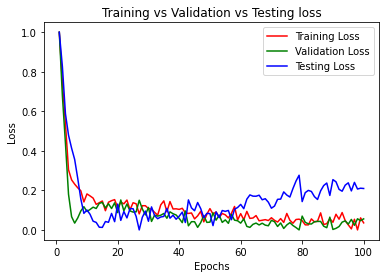

Accuracy = 0.79
Precision = 0.67
Recall = 0.60
Fscore = 0.63


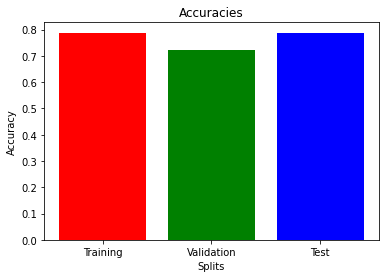

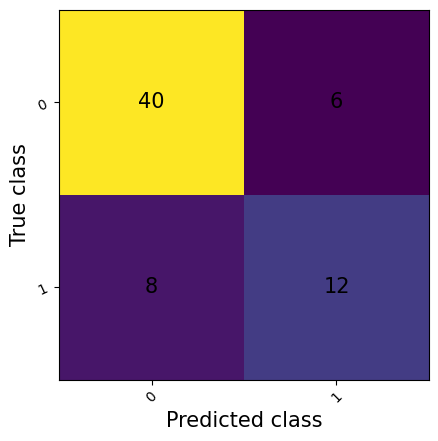

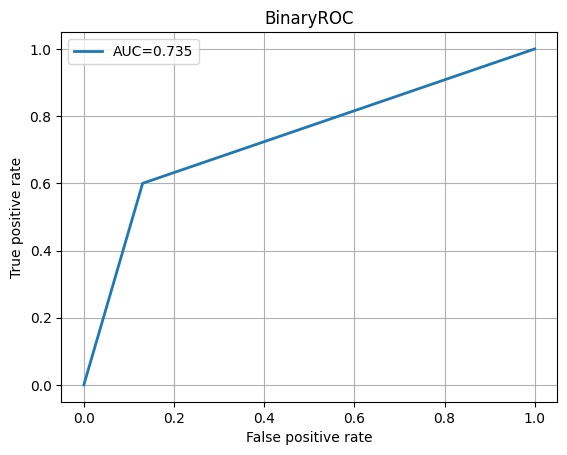

In [406]:
# NN Model
model_I = NeuralNetwork(dropout=0.2, activationFunc=nn.ELU())

# Loss Function and Optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model_I.parameters(), lr=0.001)

# Epochs and Batch size
epochs = 100
batchSize = 16

modelTraining(epochs, batchSize, criterion, optimizer, model_I)

perfEvaluation(model_I)

# Part 2

## Modifying Hyperparameter

### Change Dropout

Epoch 1, Training Loss = 21.11, Validation Loss = 3.88, Testing Loss = 2.87
Epoch 2, Training Loss = 19.53, Validation Loss = 3.43, Testing Loss = 2.82
Epoch 3, Training Loss = 18.17, Validation Loss = 3.09, Testing Loss = 2.76
Epoch 4, Training Loss = 17.08, Validation Loss = 2.92, Testing Loss = 2.67
Epoch 5, Training Loss = 16.37, Validation Loss = 2.71, Testing Loss = 2.62
Epoch 6, Training Loss = 16.63, Validation Loss = 2.67, Testing Loss = 2.57
Epoch 7, Training Loss = 16.34, Validation Loss = 2.74, Testing Loss = 2.47
Epoch 8, Training Loss = 16.44, Validation Loss = 2.78, Testing Loss = 2.40
Epoch 9, Training Loss = 15.89, Validation Loss = 2.82, Testing Loss = 2.34
Epoch 10, Training Loss = 15.67, Validation Loss = 2.72, Testing Loss = 2.37
Epoch 11, Training Loss = 16.15, Validation Loss = 2.75, Testing Loss = 2.36
Epoch 12, Training Loss = 15.93, Validation Loss = 2.81, Testing Loss = 2.33
Epoch 13, Training Loss = 15.82, Validation Loss = 2.74, Testing Loss = 2.34
Epoch 14

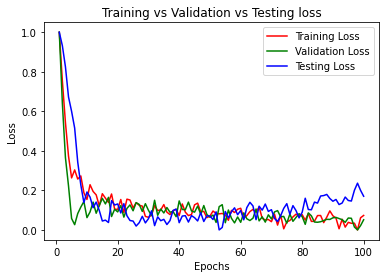

Accuracy = 0.79
Precision = 0.67
Recall = 0.60
Fscore = 0.63


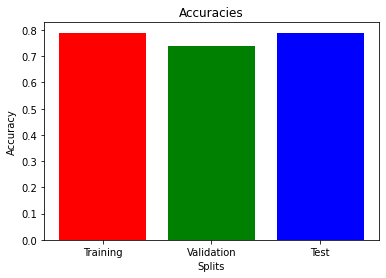

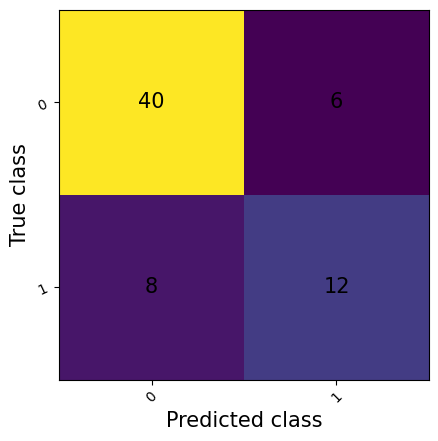

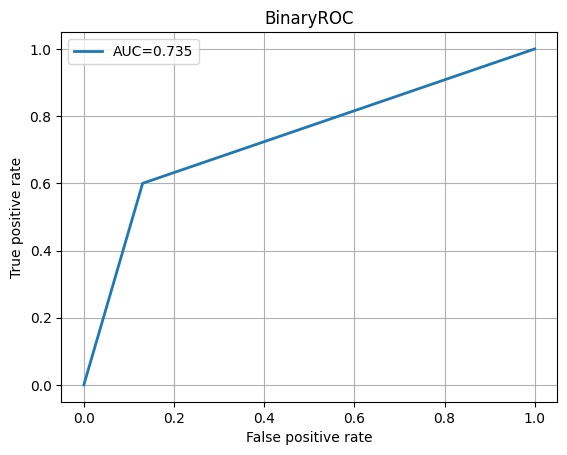

In [407]:
# Model
hyperDropout1 = NeuralNetwork(dropout=0.25, activationFunc=nn.ELU())

# Loss Function and Optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(hyperDropout1.parameters(), lr=0.001)

# Epochs and Batch size
epochs = 100
batchSize = 16

modelTraining(epochs, batchSize, criterion, optimizer, hyperDropout1)

perfEvaluation(hyperDropout1)

Epoch 1, Training Loss = 21.27, Validation Loss = 4.08, Testing Loss = 2.86
Epoch 2, Training Loss = 20.25, Validation Loss = 3.68, Testing Loss = 2.84
Epoch 3, Training Loss = 19.20, Validation Loss = 3.55, Testing Loss = 2.76
Epoch 4, Training Loss = 18.05, Validation Loss = 3.62, Testing Loss = 2.66
Epoch 5, Training Loss = 17.75, Validation Loss = 3.28, Testing Loss = 2.61
Epoch 6, Training Loss = 17.11, Validation Loss = 3.22, Testing Loss = 2.54
Epoch 7, Training Loss = 16.33, Validation Loss = 3.02, Testing Loss = 2.54
Epoch 8, Training Loss = 17.04, Validation Loss = 2.96, Testing Loss = 2.50
Epoch 9, Training Loss = 16.35, Validation Loss = 2.92, Testing Loss = 2.47
Epoch 10, Training Loss = 16.30, Validation Loss = 2.98, Testing Loss = 2.40
Epoch 11, Training Loss = 16.11, Validation Loss = 2.88, Testing Loss = 2.43
Epoch 12, Training Loss = 15.99, Validation Loss = 2.80, Testing Loss = 2.43
Epoch 13, Training Loss = 15.97, Validation Loss = 2.85, Testing Loss = 2.39
Epoch 14

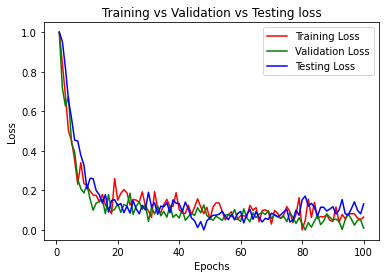

Accuracy = 0.79
Precision = 0.65
Recall = 0.65
Fscore = 0.65


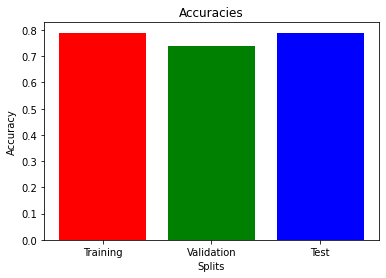

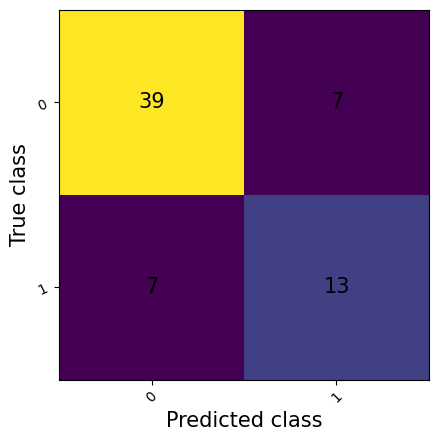

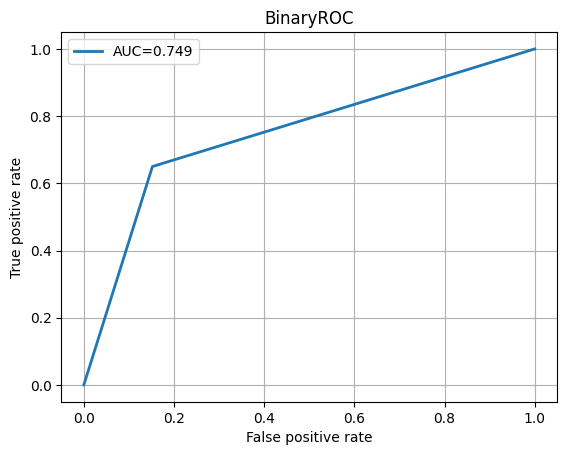

In [408]:
# Model
hyperDropout2 = NeuralNetwork(dropout=0.5, activationFunc=nn.ELU())

# Loss Function and Optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(hyperDropout2.parameters(), lr=0.001)

# Epochs and Batch size
epochsBefore = 100
batchSizeBefore = 16

modelTraining(epochs, batchSize, criterion, optimizer, hyperDropout2)

perfEvaluation(hyperDropout2)

Epoch 1, Training Loss = 22.25, Validation Loss = 3.91, Testing Loss = 2.92
Epoch 2, Training Loss = 20.76, Validation Loss = 3.86, Testing Loss = 2.89
Epoch 3, Training Loss = 20.46, Validation Loss = 3.71, Testing Loss = 2.87
Epoch 4, Training Loss = 20.39, Validation Loss = 3.61, Testing Loss = 2.84
Epoch 5, Training Loss = 19.09, Validation Loss = 3.60, Testing Loss = 2.79
Epoch 6, Training Loss = 18.81, Validation Loss = 3.48, Testing Loss = 2.77
Epoch 7, Training Loss = 18.46, Validation Loss = 3.31, Testing Loss = 2.76
Epoch 8, Training Loss = 18.99, Validation Loss = 3.17, Testing Loss = 2.76
Epoch 9, Training Loss = 18.11, Validation Loss = 3.22, Testing Loss = 2.71
Epoch 10, Training Loss = 17.59, Validation Loss = 3.14, Testing Loss = 2.69
Epoch 11, Training Loss = 16.86, Validation Loss = 3.07, Testing Loss = 2.66
Epoch 12, Training Loss = 17.02, Validation Loss = 3.08, Testing Loss = 2.61
Epoch 13, Training Loss = 17.40, Validation Loss = 2.93, Testing Loss = 2.62
Epoch 14

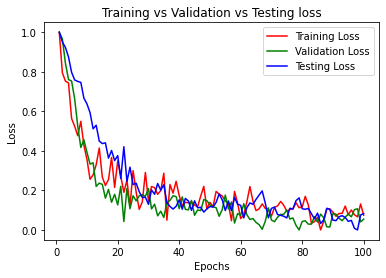

Accuracy = 0.77
Precision = 0.65
Recall = 0.55
Fscore = 0.59


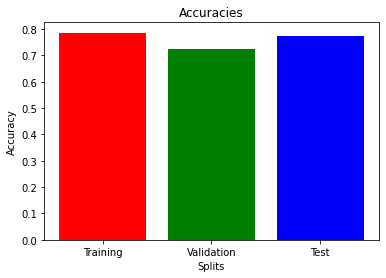

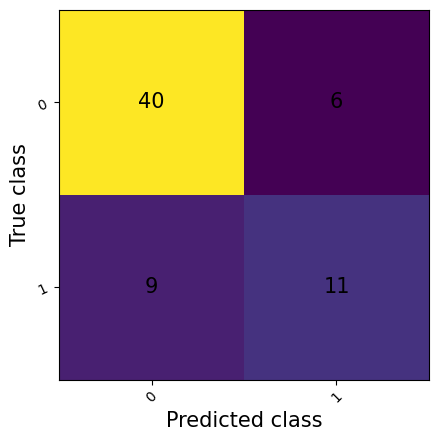

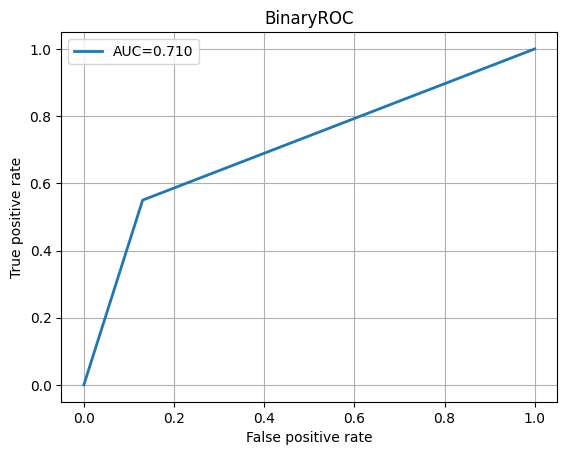

In [409]:
# Model
hyperDropout3 = NeuralNetwork(dropout=0.75, activationFunc=nn.ELU())

# Loss Function and Optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(hyperDropout3.parameters(), lr=0.001)

# Epochs and Batch size
epochs = 100
batchSize = 16

modelTraining(epochs, batchSize, criterion, optimizer, hyperDropout3)

perfEvaluation(hyperDropout3)

### Change Optimizer

Epoch 1, Training Loss = 18.79, Validation Loss = 2.73, Testing Loss = 3.03
Epoch 2, Training Loss = 16.35, Validation Loss = 2.50, Testing Loss = 2.97
Epoch 3, Training Loss = 15.95, Validation Loss = 2.46, Testing Loss = 2.89
Epoch 4, Training Loss = 15.76, Validation Loss = 2.41, Testing Loss = 2.86
Epoch 5, Training Loss = 15.84, Validation Loss = 2.42, Testing Loss = 2.79
Epoch 6, Training Loss = 15.65, Validation Loss = 2.43, Testing Loss = 2.75
Epoch 7, Training Loss = 15.32, Validation Loss = 2.47, Testing Loss = 2.64
Epoch 8, Training Loss = 15.39, Validation Loss = 2.47, Testing Loss = 2.63
Epoch 9, Training Loss = 15.42, Validation Loss = 2.49, Testing Loss = 2.59
Epoch 10, Training Loss = 15.39, Validation Loss = 2.44, Testing Loss = 2.67
Epoch 11, Training Loss = 15.33, Validation Loss = 2.44, Testing Loss = 2.65
Epoch 12, Training Loss = 15.24, Validation Loss = 2.47, Testing Loss = 2.61
Epoch 13, Training Loss = 15.28, Validation Loss = 2.46, Testing Loss = 2.60
Epoch 14

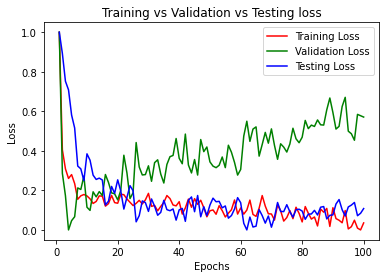

Accuracy = 0.77
Precision = 0.62
Recall = 0.65
Fscore = 0.63


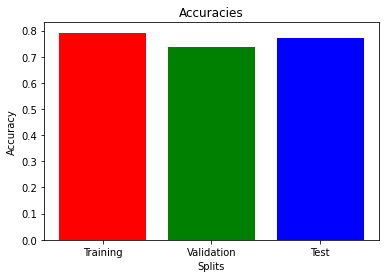

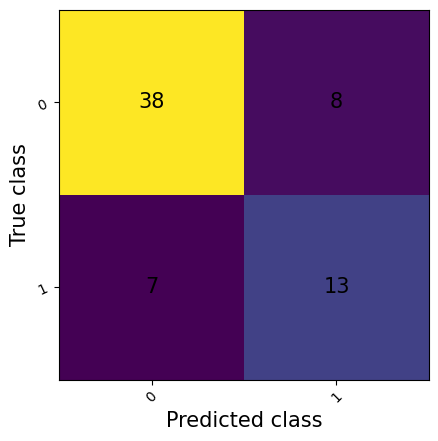

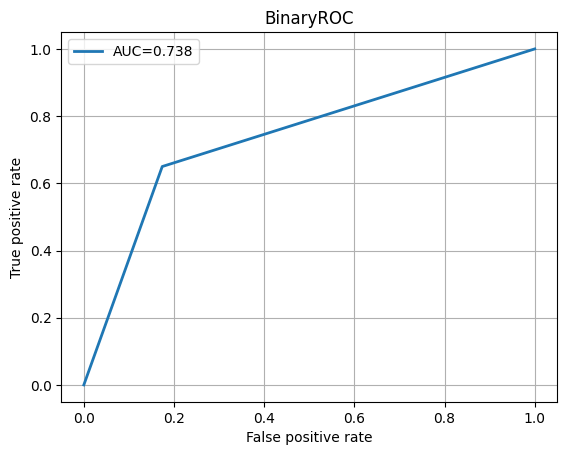

In [410]:
# Model
hyperOptimizer1 = NeuralNetwork(dropout=0.2, activationFunc=nn.ELU())

# Loss Function and Optimizer
criterion = nn.BCELoss()
optimizer = optim.RMSprop(hyperOptimizer1.parameters(), lr=0.001)

# Epochs and Batch size
epochs = 100
batchSize = 16

modelTraining(epochs, batchSize, criterion, optimizer, hyperOptimizer1)

perfEvaluation(hyperOptimizer1)

Epoch 1, Training Loss = 22.19, Validation Loss = 3.64, Testing Loss = 3.16
Epoch 2, Training Loss = 21.52, Validation Loss = 3.74, Testing Loss = 3.05
Epoch 3, Training Loss = 21.28, Validation Loss = 3.81, Testing Loss = 2.99
Epoch 4, Training Loss = 21.01, Validation Loss = 3.84, Testing Loss = 2.97
Epoch 5, Training Loss = 21.05, Validation Loss = 3.84, Testing Loss = 2.95
Epoch 6, Training Loss = 21.02, Validation Loss = 3.83, Testing Loss = 2.94
Epoch 7, Training Loss = 20.69, Validation Loss = 3.82, Testing Loss = 2.92
Epoch 8, Training Loss = 20.53, Validation Loss = 3.81, Testing Loss = 2.91
Epoch 9, Training Loss = 20.68, Validation Loss = 3.79, Testing Loss = 2.90
Epoch 10, Training Loss = 20.63, Validation Loss = 3.77, Testing Loss = 2.89
Epoch 11, Training Loss = 20.23, Validation Loss = 3.77, Testing Loss = 2.88
Epoch 12, Training Loss = 20.34, Validation Loss = 3.75, Testing Loss = 2.87
Epoch 13, Training Loss = 20.08, Validation Loss = 3.74, Testing Loss = 2.86
Epoch 14

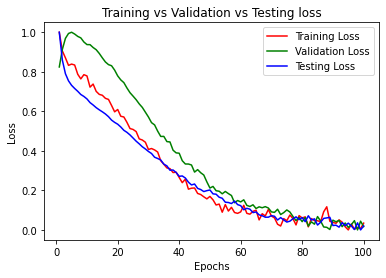

Accuracy = 0.79
Precision = 0.67
Recall = 0.60
Fscore = 0.63


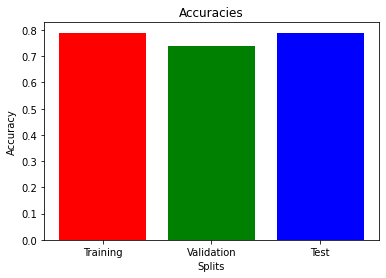

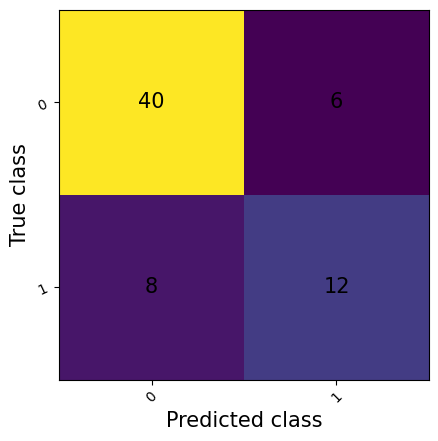

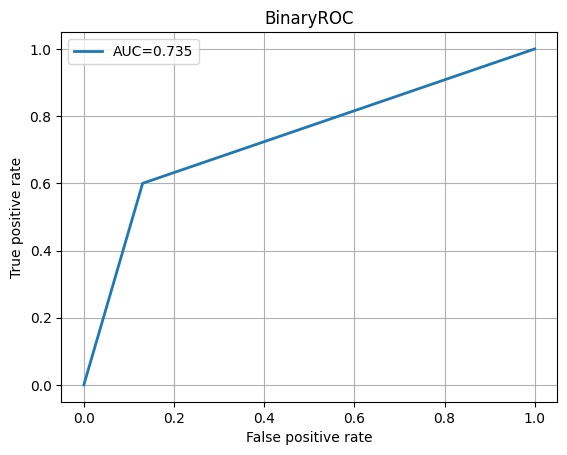

In [411]:
# Model
hyperOptimizer2 = NeuralNetwork(dropout=0.2, activationFunc=nn.ELU())

# Loss Function and Optimizer
criterion = nn.BCELoss()
optimizer = optim.SGD(hyperOptimizer2.parameters(), lr=0.001, momentum=0.9)

# Epochs and Batch size
epochs = 100
batchSize = 16

modelTraining(epochs, batchSize, criterion, optimizer, hyperOptimizer2)

perfEvaluation(hyperOptimizer2)

Epoch 1, Training Loss = 21.36, Validation Loss = 3.98, Testing Loss = 2.83
Epoch 2, Training Loss = 19.74, Validation Loss = 3.56, Testing Loss = 2.74
Epoch 3, Training Loss = 18.29, Validation Loss = 3.25, Testing Loss = 2.62
Epoch 4, Training Loss = 17.25, Validation Loss = 2.95, Testing Loss = 2.55
Epoch 5, Training Loss = 16.46, Validation Loss = 2.80, Testing Loss = 2.48
Epoch 6, Training Loss = 16.27, Validation Loss = 2.72, Testing Loss = 2.45
Epoch 7, Training Loss = 15.89, Validation Loss = 2.76, Testing Loss = 2.38
Epoch 8, Training Loss = 15.76, Validation Loss = 2.77, Testing Loss = 2.34
Epoch 9, Training Loss = 15.81, Validation Loss = 2.73, Testing Loss = 2.34
Epoch 10, Training Loss = 15.83, Validation Loss = 2.71, Testing Loss = 2.34
Epoch 11, Training Loss = 16.00, Validation Loss = 2.79, Testing Loss = 2.30
Epoch 12, Training Loss = 15.78, Validation Loss = 2.82, Testing Loss = 2.30
Epoch 13, Training Loss = 15.80, Validation Loss = 2.80, Testing Loss = 2.30
Epoch 14

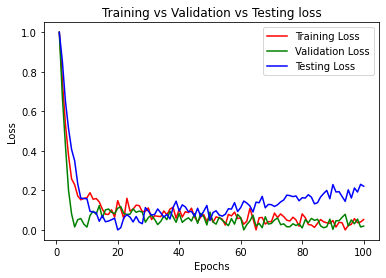

Accuracy = 0.79
Precision = 0.69
Recall = 0.55
Fscore = 0.61


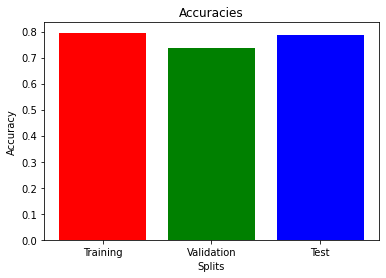

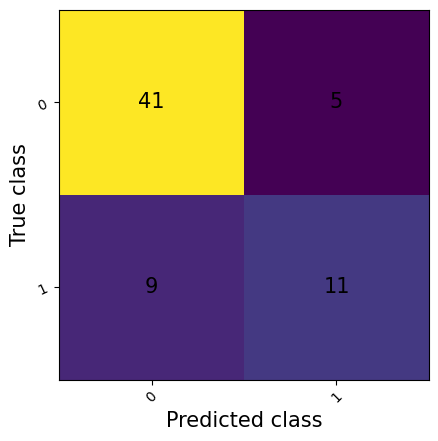

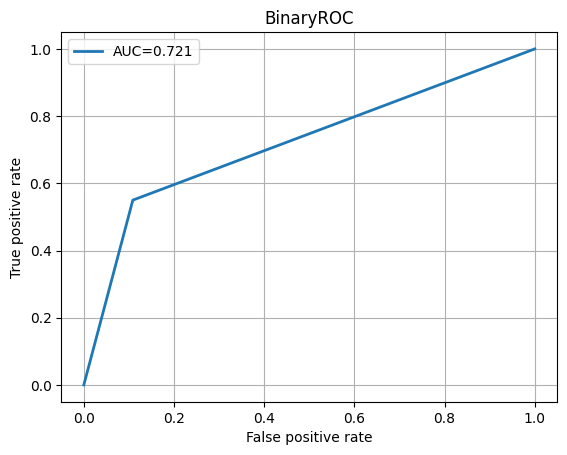

In [412]:
# Model
hyperOptimizer3 = NeuralNetwork(dropout=0.2, activationFunc=nn.ELU())

# Loss Function and Optimizer
criterion = nn.BCELoss()
optimizer = optim.AdamW(hyperOptimizer3.parameters(), lr=0.001)

# Epochs and Batch size
epochs = 100
batchSize = 16

modelTraining(epochs, batchSize, criterion, optimizer, hyperOptimizer3)

perfEvaluation(hyperOptimizer3)

### Change Activation Function

Epoch 1, Training Loss = 22.14, Validation Loss = 3.69, Testing Loss = 3.03
Epoch 2, Training Loss = 20.61, Validation Loss = 3.75, Testing Loss = 2.86
Epoch 3, Training Loss = 19.51, Validation Loss = 3.51, Testing Loss = 2.75
Epoch 4, Training Loss = 18.10, Validation Loss = 3.17, Testing Loss = 2.65
Epoch 5, Training Loss = 17.02, Validation Loss = 2.95, Testing Loss = 2.56
Epoch 6, Training Loss = 16.57, Validation Loss = 2.82, Testing Loss = 2.49
Epoch 7, Training Loss = 16.19, Validation Loss = 2.91, Testing Loss = 2.38
Epoch 8, Training Loss = 16.08, Validation Loss = 2.77, Testing Loss = 2.39
Epoch 9, Training Loss = 15.67, Validation Loss = 2.82, Testing Loss = 2.34
Epoch 10, Training Loss = 16.10, Validation Loss = 2.79, Testing Loss = 2.34
Epoch 11, Training Loss = 15.88, Validation Loss = 2.81, Testing Loss = 2.34
Epoch 12, Training Loss = 15.21, Validation Loss = 2.75, Testing Loss = 2.33
Epoch 13, Training Loss = 15.70, Validation Loss = 2.81, Testing Loss = 2.31
Epoch 14

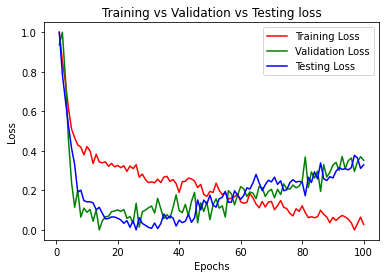

Accuracy = 0.77
Precision = 0.65
Recall = 0.55
Fscore = 0.59


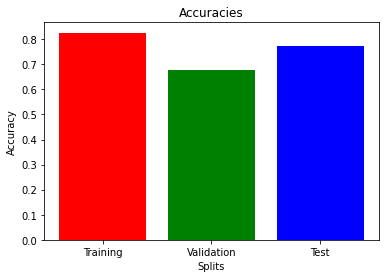

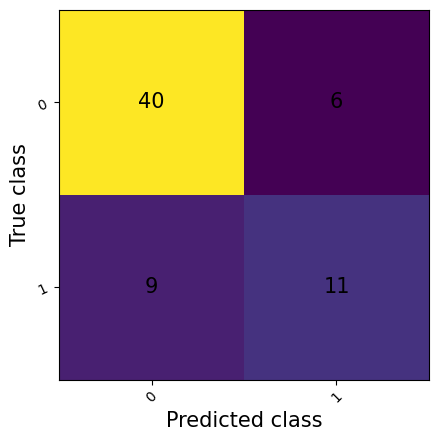

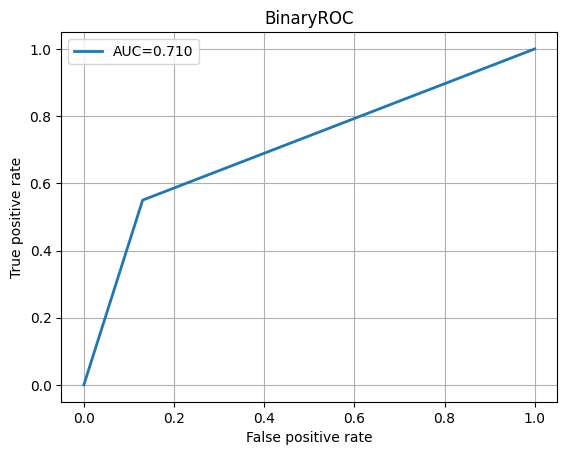

In [413]:
# Model
hyperActivtionFunc1 = NeuralNetwork(dropout=0.2, activationFunc=nn.LeakyReLU())

# Loss Function and Optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(hyperActivtionFunc1.parameters(), lr=0.001)

# Epochs and Batch size
epochs = 100
batchSize = 16

modelTraining(epochs, batchSize, criterion, optimizer, hyperActivtionFunc1)

perfEvaluation(hyperActivtionFunc1)

Epoch 1, Training Loss = 21.90, Validation Loss = 3.83, Testing Loss = 2.99
Epoch 2, Training Loss = 20.48, Validation Loss = 3.65, Testing Loss = 2.90
Epoch 3, Training Loss = 19.11, Validation Loss = 3.33, Testing Loss = 2.79
Epoch 4, Training Loss = 17.55, Validation Loss = 3.01, Testing Loss = 2.68
Epoch 5, Training Loss = 16.80, Validation Loss = 2.82, Testing Loss = 2.60
Epoch 6, Training Loss = 16.49, Validation Loss = 2.77, Testing Loss = 2.50
Epoch 7, Training Loss = 16.14, Validation Loss = 2.69, Testing Loss = 2.46
Epoch 8, Training Loss = 15.61, Validation Loss = 2.72, Testing Loss = 2.41
Epoch 9, Training Loss = 15.48, Validation Loss = 2.69, Testing Loss = 2.39
Epoch 10, Training Loss = 15.72, Validation Loss = 2.63, Testing Loss = 2.40
Epoch 11, Training Loss = 15.27, Validation Loss = 2.67, Testing Loss = 2.34
Epoch 12, Training Loss = 15.63, Validation Loss = 2.70, Testing Loss = 2.32
Epoch 13, Training Loss = 15.54, Validation Loss = 2.74, Testing Loss = 2.30
Epoch 14

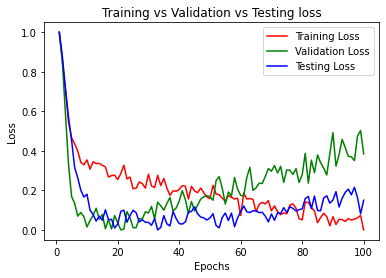

Accuracy = 0.76
Precision = 0.62
Recall = 0.50
Fscore = 0.56


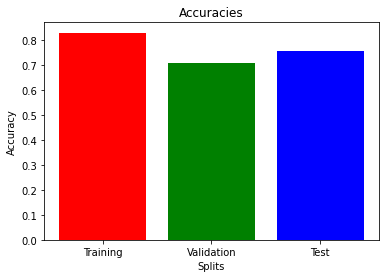

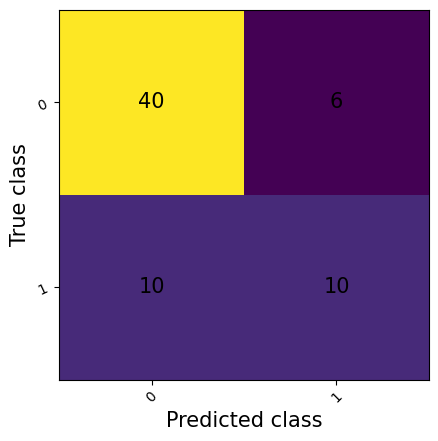

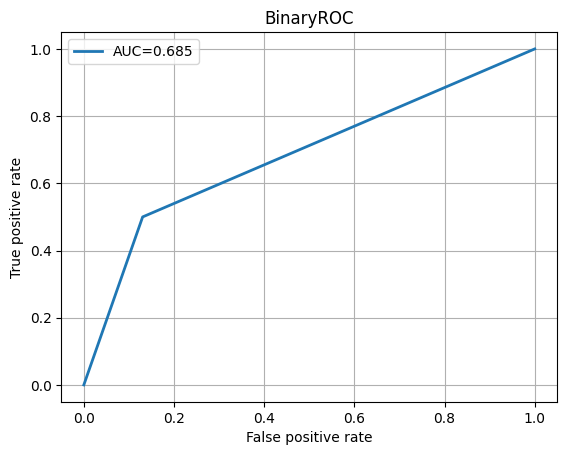

In [417]:
# Model
hyperActivtionFunc2 = NeuralNetwork(dropout=0.2, activationFunc=nn.ReLU())

# Loss Function and Optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(hyperActivtionFunc2.parameters(), lr=0.001)

# Epochs and Batch size
epochs = 100
batchSize = 16

modelTraining(epochs, batchSize, criterion, optimizer, hyperActivtionFunc2)

perfEvaluation(hyperActivtionFunc2)

Epoch 1, Training Loss = 20.55, Validation Loss = 3.37, Testing Loss = 2.87
Epoch 2, Training Loss = 18.37, Validation Loss = 3.09, Testing Loss = 2.73
Epoch 3, Training Loss = 17.01, Validation Loss = 2.64, Testing Loss = 2.78
Epoch 4, Training Loss = 16.14, Validation Loss = 2.57, Testing Loss = 2.68
Epoch 5, Training Loss = 16.27, Validation Loss = 2.55, Testing Loss = 2.61
Epoch 6, Training Loss = 15.86, Validation Loss = 2.53, Testing Loss = 2.54
Epoch 7, Training Loss = 16.20, Validation Loss = 2.55, Testing Loss = 2.48
Epoch 8, Training Loss = 16.05, Validation Loss = 2.64, Testing Loss = 2.41
Epoch 9, Training Loss = 15.71, Validation Loss = 2.67, Testing Loss = 2.40
Epoch 10, Training Loss = 15.68, Validation Loss = 2.78, Testing Loss = 2.34
Epoch 11, Training Loss = 15.45, Validation Loss = 2.76, Testing Loss = 2.33
Epoch 12, Training Loss = 15.46, Validation Loss = 2.66, Testing Loss = 2.39
Epoch 13, Training Loss = 15.51, Validation Loss = 2.75, Testing Loss = 2.34
Epoch 14

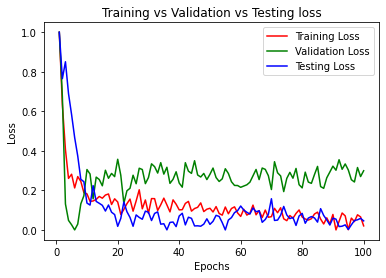

Accuracy = 0.80
Precision = 0.73
Recall = 0.55
Fscore = 0.63


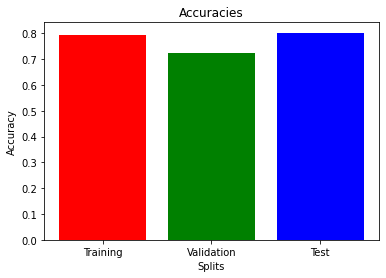

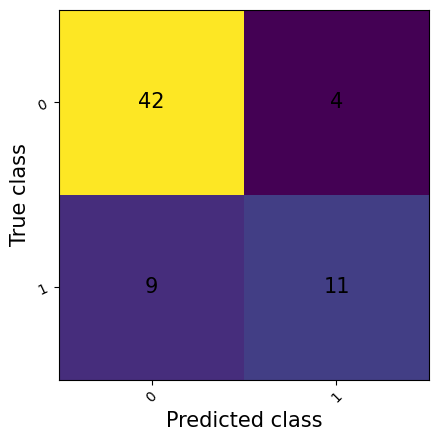

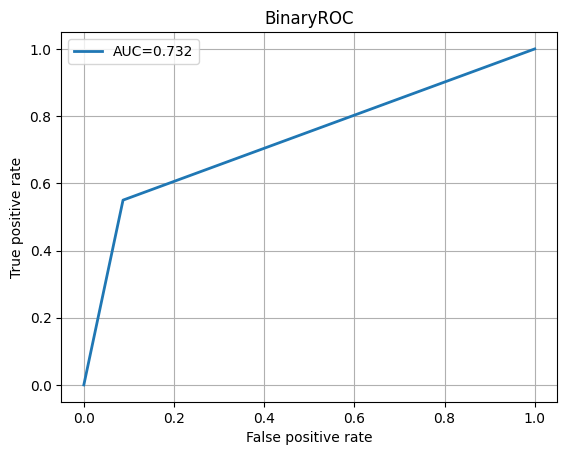

In [419]:
# Model
hyperActivtionFunc3 = NeuralNetwork(dropout=0.2, activationFunc=nn.SELU())

# Loss Function and Optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(hyperActivtionFunc3.parameters(), lr=0.001)

# Epochs and Batch size
epochs = 100
batchSize = 16

modelTraining(epochs, batchSize, criterion, optimizer, hyperActivtionFunc3)

perfEvaluation(hyperActivtionFunc3)

### Change Initializer

Epoch 1, Training Loss = 21.78, Validation Loss = 3.89, Testing Loss = 3.17
Epoch 2, Training Loss = 20.38, Validation Loss = 3.61, Testing Loss = 3.20
Epoch 3, Training Loss = 19.53, Validation Loss = 3.41, Testing Loss = 3.21
Epoch 4, Training Loss = 18.56, Validation Loss = 3.29, Testing Loss = 3.15
Epoch 5, Training Loss = 18.00, Validation Loss = 3.13, Testing Loss = 3.06
Epoch 6, Training Loss = 17.36, Validation Loss = 3.04, Testing Loss = 2.93
Epoch 7, Training Loss = 16.83, Validation Loss = 2.90, Testing Loss = 2.84
Epoch 8, Training Loss = 16.46, Validation Loss = 2.90, Testing Loss = 2.69
Epoch 9, Training Loss = 16.11, Validation Loss = 2.75, Testing Loss = 2.64
Epoch 10, Training Loss = 16.17, Validation Loss = 2.81, Testing Loss = 2.52
Epoch 11, Training Loss = 15.90, Validation Loss = 2.77, Testing Loss = 2.47
Epoch 12, Training Loss = 15.69, Validation Loss = 2.68, Testing Loss = 2.49
Epoch 13, Training Loss = 15.79, Validation Loss = 2.70, Testing Loss = 2.43
Epoch 14

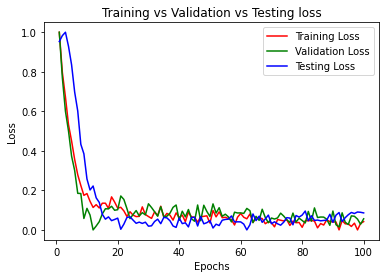

Accuracy = 0.79
Precision = 0.69
Recall = 0.55
Fscore = 0.61


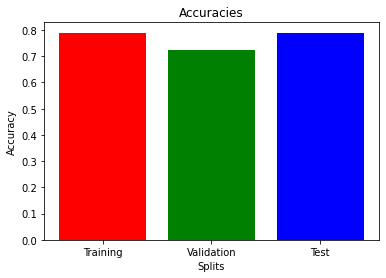

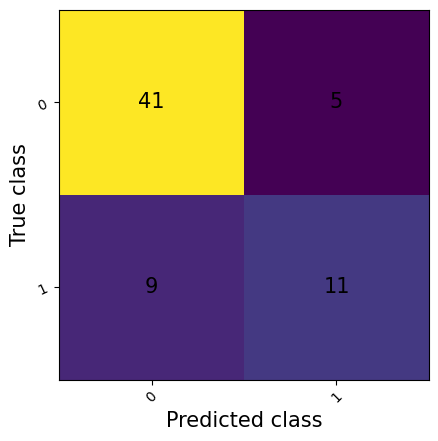

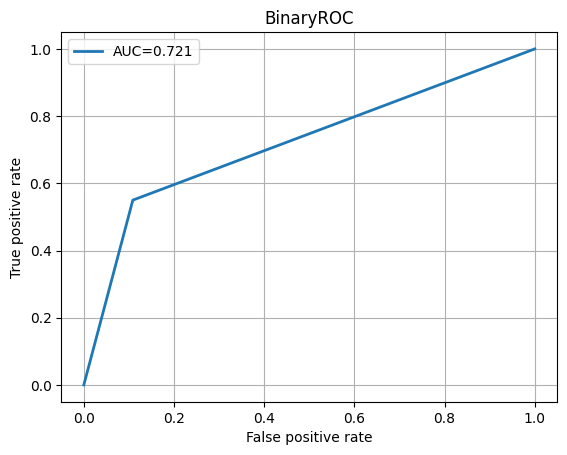

In [426]:
class NeuralNetworkInit1(nn.Module):
    def __init__(self, dropout, activationFunc):
        super().__init__()
        self.linear = nn.Sequential(
            nn.Linear(7, 128),
            activationFunc,
            nn.Dropout(dropout),
            nn.Linear(128, 64),
            activationFunc,
            nn.Dropout(dropout),
            nn.Linear(64, 1)
        )
        self.sigmoid = nn.Sigmoid()

        # Xavier Uniform Initializer
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.xavier_uniform_(m.weight)
                nn.init.constant_(m.bias, 0)

    def forward(self, x):
        x = self.linear(x)
        x = self.sigmoid(x)
        return x

# Model
hyperInitializer1 = NeuralNetworkInit1(dropout=0.2, activationFunc=nn.ELU())

# Loss Function and Optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(hyperInitializer1.parameters(), lr=0.001)

# Epochs and Batch size
epochs = 100
batchSize = 16

modelTraining(epochs, batchSize, criterion, optimizer, hyperInitializer1)

perfEvaluation(hyperInitializer1)

Epoch 1, Training Loss = 23.83, Validation Loss = 3.70, Testing Loss = 3.03
Epoch 2, Training Loss = 20.51, Validation Loss = 3.62, Testing Loss = 3.02
Epoch 3, Training Loss = 20.36, Validation Loss = 3.25, Testing Loss = 3.11
Epoch 4, Training Loss = 19.18, Validation Loss = 3.16, Testing Loss = 3.09
Epoch 5, Training Loss = 18.71, Validation Loss = 3.07, Testing Loss = 3.06
Epoch 6, Training Loss = 18.92, Validation Loss = 3.01, Testing Loss = 2.98
Epoch 7, Training Loss = 17.89, Validation Loss = 3.13, Testing Loss = 2.84
Epoch 8, Training Loss = 17.78, Validation Loss = 2.89, Testing Loss = 2.91
Epoch 9, Training Loss = 18.39, Validation Loss = 2.89, Testing Loss = 2.81
Epoch 10, Training Loss = 17.85, Validation Loss = 3.03, Testing Loss = 2.76
Epoch 11, Training Loss = 17.34, Validation Loss = 2.91, Testing Loss = 2.73
Epoch 12, Training Loss = 16.95, Validation Loss = 2.93, Testing Loss = 2.67
Epoch 13, Training Loss = 17.47, Validation Loss = 2.84, Testing Loss = 2.71
Epoch 14

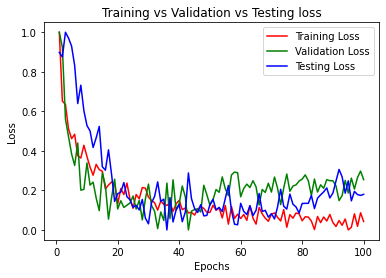

Accuracy = 0.76
Precision = 0.60
Recall = 0.60
Fscore = 0.60


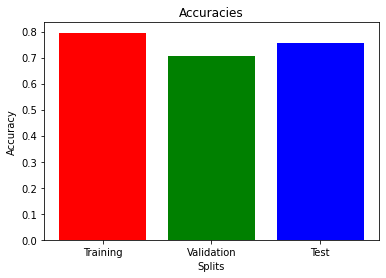

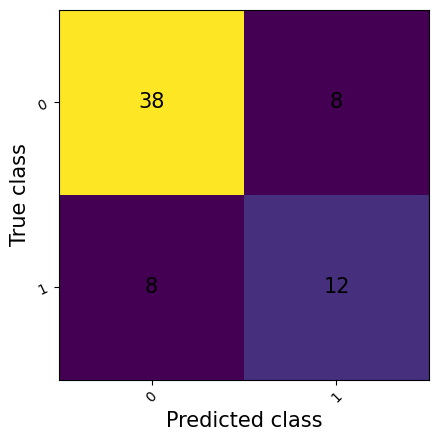

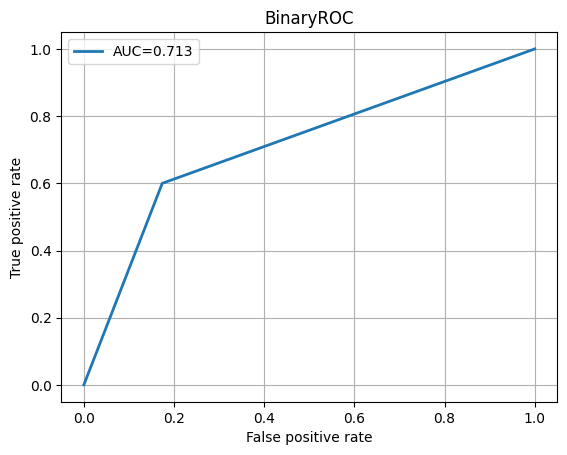

In [427]:
class NeuralNetworkInit2(nn.Module):
    def __init__(self, dropout, activationFunc):
        super().__init__()
        self.linear = nn.Sequential(
            nn.Linear(7, 128),
            activationFunc,
            nn.Dropout(dropout),
            nn.Linear(128, 64),
            activationFunc,
            nn.Dropout(dropout),
            nn.Linear(64, 1)
        )
        self.sigmoid = nn.Sigmoid()

        # He Uniform Initializer
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.kaiming_uniform_(m.weight)
                nn.init.constant_(m.bias, 0)

    def forward(self, x):
        x = self.linear(x)
        x = self.sigmoid(x)
        return x

# Model
hyperInitializer2 = NeuralNetworkInit2(dropout=0.2, activationFunc=nn.ELU())

# Loss Function and Optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(hyperInitializer2.parameters(), lr=0.001)

# Epochs and Batch size
epochs = 100
batchSize = 16

modelTraining(epochs, batchSize, criterion, optimizer, hyperInitializer2)

perfEvaluation(hyperInitializer2)

Epoch 1, Training Loss = 31.04, Validation Loss = 3.32, Testing Loss = 3.57
Epoch 2, Training Loss = 22.29, Validation Loss = 3.42, Testing Loss = 3.31
Epoch 3, Training Loss = 21.67, Validation Loss = 3.47, Testing Loss = 3.17
Epoch 4, Training Loss = 21.09, Validation Loss = 3.55, Testing Loss = 3.04
Epoch 5, Training Loss = 20.56, Validation Loss = 3.61, Testing Loss = 2.94
Epoch 6, Training Loss = 20.03, Validation Loss = 3.53, Testing Loss = 2.90
Epoch 7, Training Loss = 19.31, Validation Loss = 3.33, Testing Loss = 2.87
Epoch 8, Training Loss = 18.31, Validation Loss = 3.14, Testing Loss = 2.82
Epoch 9, Training Loss = 17.41, Validation Loss = 2.97, Testing Loss = 2.78
Epoch 10, Training Loss = 16.80, Validation Loss = 2.82, Testing Loss = 2.74
Epoch 11, Training Loss = 16.40, Validation Loss = 2.74, Testing Loss = 2.69
Epoch 12, Training Loss = 16.38, Validation Loss = 2.74, Testing Loss = 2.61
Epoch 13, Training Loss = 16.03, Validation Loss = 2.78, Testing Loss = 2.53
Epoch 14

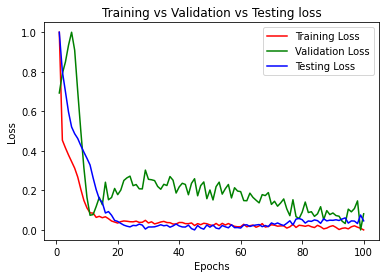

Accuracy = 0.79
Precision = 0.69
Recall = 0.55
Fscore = 0.61


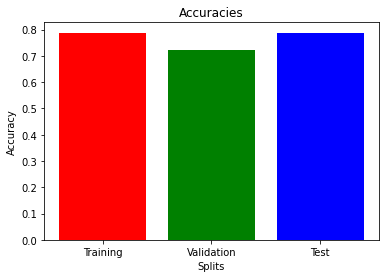

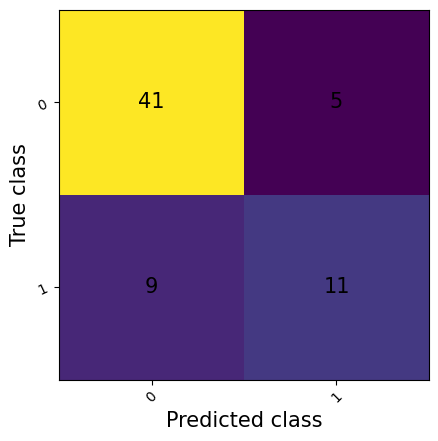

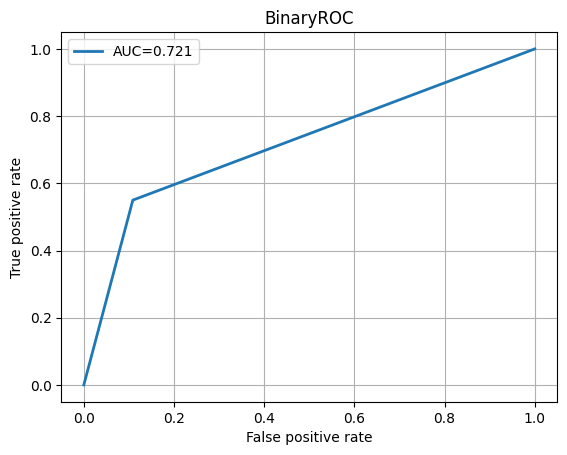

In [428]:
class NeuralNetworkInit3(nn.Module):
    def __init__(self, dropout, activationFunc):
        super().__init__()
        self.linear = nn.Sequential(
            nn.Linear(7, 128),
            activationFunc,
            nn.Dropout(dropout),
            nn.Linear(128, 64),
            activationFunc,
            nn.Dropout(dropout),
            nn.Linear(64, 1)
        )
        self.sigmoid = nn.Sigmoid()

        # Uniform Initializer
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.uniform_(m.weight, a=0, b=0.1)
                nn.init.constant_(m.bias, 0)

    def forward(self, x):
        x = self.linear(x)
        x = self.sigmoid(x)
        return x

# Model
hyperInitializer3 = NeuralNetworkInit3(dropout=0.2, activationFunc=nn.ELU())

# Loss Function and Optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(hyperInitializer3.parameters(), lr=0.001)

# Epochs and Batch size
epochs = 100
batchSize = 16

modelTraining(epochs, batchSize, criterion, optimizer, hyperInitializer3)

perfEvaluation(hyperInitializer3)

### Step 2 Result and Base Model Selection

<p>From all the hyperparameters tuning we can notice <b>SELU Activation Function</b> gives us the best accuracy. Therefore we use it as our base model for further improving accuracy.</p>

## Training optimization method

### Early Stopping

Epoch 1, Training Loss = 20.64, Validation Loss = 3.44, Testing Loss = 2.86
Epoch 2, Training Loss = 18.89, Validation Loss = 3.26, Testing Loss = 2.69
Epoch 3, Training Loss = 17.72, Validation Loss = 2.89, Testing Loss = 2.63
Epoch 4, Training Loss = 16.36, Validation Loss = 2.68, Testing Loss = 2.60
Epoch 5, Training Loss = 16.54, Validation Loss = 2.56, Testing Loss = 2.59
Epoch 6, Training Loss = 15.98, Validation Loss = 2.50, Testing Loss = 2.57
Epoch 7, Training Loss = 16.45, Validation Loss = 2.63, Testing Loss = 2.44
Epoch 8, Training Loss = 15.93, Validation Loss = 2.76, Testing Loss = 2.35
Epoch 9, Training Loss = 15.78, Validation Loss = 2.69, Testing Loss = 2.37
Epoch 10, Training Loss = 15.71, Validation Loss = 2.78, Testing Loss = 2.31
Epoch 11, Training Loss = 15.78, Validation Loss = 2.80, Testing Loss = 2.31
Epoch 12, Training Loss = 15.77, Validation Loss = 2.70, Testing Loss = 2.36
Epoch 13, Training Loss = 15.72, Validation Loss = 2.84, Testing Loss = 2.29
Epoch 14

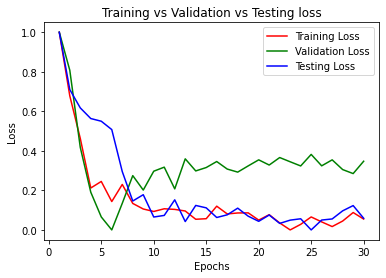

Accuracy = 0.82
Accuracy = 0.80


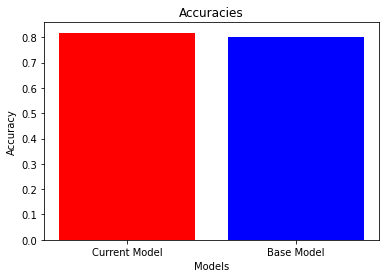

In [430]:
# NN Model
# Base Model = SELU Activation Function
modelNN1 = NeuralNetwork(dropout=0.2, activationFunc=nn.SELU())

# Loss function and Optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(modelNN1.parameters(), lr=0.001)

# Epochs and batch size
epochs = 30
batchSize = 16

modelTraining(epochs, batchSize, criterion, optimizer, modelNN1)

# Performance Evaluation
modelNN1.eval()
hyperActivtionFunc3.eval()

# Forward pass disabling Backward propagation
with torch.no_grad():
    outputs = modelNN1(X_test_tensor)
    y_test_pred_cur = (outputs >= 0.5)
    y_test_pred_cur = y_test_pred_cur.float() # Sets False->0 and True->1

    outputs_base = hyperActivtionFunc3(X_test_tensor)
    y_test_pred_base = (outputs_base >= 0.5)
    y_test_pred_base = y_test_pred_base.float() # Sets False->0 and True->1

# Accuracy currentmodel
metric_cur = BinaryAccuracy()
test_accuracy_cur = metric_cur(y_test_pred_cur, y_test_tensor)
print(f"Accuracy = {test_accuracy_cur:.2f}")

# Accuracy Base model
metric_base = BinaryAccuracy()
test_accuracy_base = metric_base(y_test_pred_base, y_test_tensor)
print(f"Accuracy = {test_accuracy_base:.2f}")

# Plot the Accuracies
labels = ['Current Model', 'Base Model']
accuracies = [test_accuracy_cur, test_accuracy_base]
plt.bar(labels, accuracies, color=['red', 'blue'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracies')
plt.show()

### Batch Normalization

Epoch 1, Training Loss = 20.39, Validation Loss = 2.47, Testing Loss = 3.37
Epoch 2, Training Loss = 18.42, Validation Loss = 2.49, Testing Loss = 3.08
Epoch 3, Training Loss = 17.55, Validation Loss = 2.46, Testing Loss = 3.00
Epoch 4, Training Loss = 17.07, Validation Loss = 2.52, Testing Loss = 2.92
Epoch 5, Training Loss = 16.74, Validation Loss = 2.53, Testing Loss = 2.76
Epoch 6, Training Loss = 16.36, Validation Loss = 2.46, Testing Loss = 2.80
Epoch 7, Training Loss = 15.79, Validation Loss = 2.59, Testing Loss = 2.59
Epoch 8, Training Loss = 15.98, Validation Loss = 2.62, Testing Loss = 2.53
Epoch 9, Training Loss = 15.43, Validation Loss = 2.65, Testing Loss = 2.48
Epoch 10, Training Loss = 15.58, Validation Loss = 2.75, Testing Loss = 2.41
Epoch 11, Training Loss = 15.51, Validation Loss = 2.78, Testing Loss = 2.43
Epoch 12, Training Loss = 15.49, Validation Loss = 2.72, Testing Loss = 2.44
Epoch 13, Training Loss = 15.31, Validation Loss = 2.85, Testing Loss = 2.38
Epoch 14

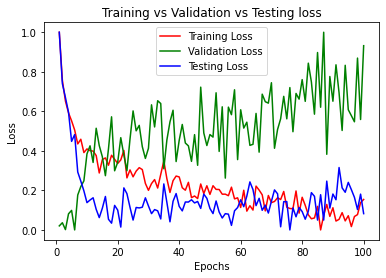

Accuracy = 0.77
Accuracy = 0.80


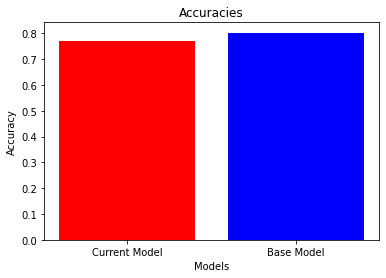

In [431]:
# NN Model
# Base Model = SELU Activation Function
class NeuralNetworkBatchNorm(nn.Module):
    def __init__(self, dropout, activationFunc):
        super().__init__()
        self.linear_relu = nn.Sequential(
            nn.Linear(7, 128),
            nn.BatchNorm1d(128),
            activationFunc,
            nn.Dropout(dropout),
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            activationFunc,
            nn.Dropout(dropout),
            nn.Linear(64, 1)
        )
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.linear_relu(x)
        x = self.sigmoid(x)
        return x

modelNN2 = NeuralNetworkBatchNorm(dropout=0.2, activationFunc=nn.SELU())

# Loss function and Optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(modelNN2.parameters(), lr=0.001)

# Epochs and batch size
epochs = 100
batchSize = 16

modelTraining(epochs, batchSize, criterion, optimizer, modelNN2)

# Performance Evaluation
modelNN2.eval()
hyperActivtionFunc3.eval()

# Forward pass disabling Backward propagation
with torch.no_grad():
    outputs = modelNN2(X_test_tensor)
    y_test_pred_cur = (outputs >= 0.5)
    y_test_pred_cur = y_test_pred_cur.float() # Sets False->0 and True->1

    outputs_base = hyperActivtionFunc3(X_test_tensor)
    y_test_pred_base = (outputs_base >= 0.5)
    y_test_pred_base = y_test_pred_base.float() # Sets False->0 and True->1

# Accuracy currentmodel
metric_cur = BinaryAccuracy()
test_accuracy_cur = metric_cur(y_test_pred_cur, y_test_tensor)
print(f"Accuracy = {test_accuracy_cur:.2f}")

# Accuracy Base model
metric_base = BinaryAccuracy()
test_accuracy_base = metric_base(y_test_pred_base, y_test_tensor)
print(f"Accuracy = {test_accuracy_base:.2f}")

# Plot the Accuracies
labels = ['Current Model', 'Base Model']
accuracies = [test_accuracy_cur, test_accuracy_base]
plt.bar(labels, accuracies, color=['red', 'blue'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracies')
plt.show()

### Learning rate scheduler

Epoch 1, Training Loss = 20.44, Validation Loss = 3.40, Testing Loss = 2.73
Epoch 2, Training Loss = 17.98, Validation Loss = 3.15, Testing Loss = 2.55
Epoch 3, Training Loss = 16.89, Validation Loss = 2.78, Testing Loss = 2.57
Epoch 4, Training Loss = 16.32, Validation Loss = 2.67, Testing Loss = 2.55
Epoch 5, Training Loss = 15.36, Validation Loss = 2.72, Testing Loss = 2.51
Epoch 6, Training Loss = 15.73, Validation Loss = 2.78, Testing Loss = 2.46
Epoch 7, Training Loss = 15.37, Validation Loss = 2.78, Testing Loss = 2.46
Epoch 8, Training Loss = 15.12, Validation Loss = 2.78, Testing Loss = 2.46
Epoch 9, Training Loss = 15.33, Validation Loss = 2.78, Testing Loss = 2.46
Epoch 10, Training Loss = 15.21, Validation Loss = 2.78, Testing Loss = 2.46
Epoch 11, Training Loss = 15.32, Validation Loss = 2.78, Testing Loss = 2.46
Epoch 12, Training Loss = 15.42, Validation Loss = 2.78, Testing Loss = 2.46
Epoch 13, Training Loss = 15.29, Validation Loss = 2.78, Testing Loss = 2.46
Epoch 14

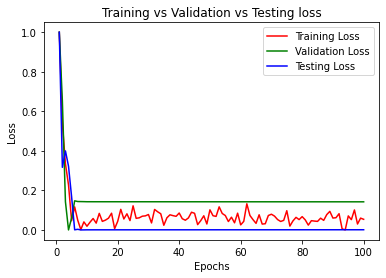

Accuracy = 0.79
Accuracy = 0.80


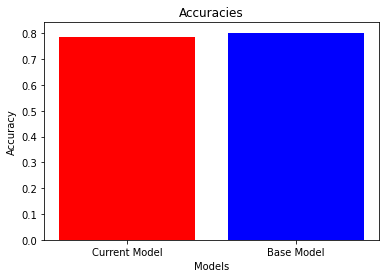

In [432]:
# NN Model
# Base Model = SELU Activation Function
modelNN3 = NeuralNetwork(dropout=0.2, activationFunc=nn.SELU())

# Loss function and Optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(modelNN3.parameters(), lr=0.001)

# Epochs and batch size
epochs = 100
batchSize = 16

# Model Training NN3 Learning Rate
def modelTrainingNN3(epochs, batchSize, criterion, optimizer, model):
    # Start time
    startTime = time.time()

    training_loss_plt_arr = []
    validation_loss_plt_arr = []
    testing_loss_plt_arr = []

    # learning rate scheduler
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max')

    # Training loop
    for epoch in range(epochs):
        # Set model to training mode
        model.train()
        training_loss = 0.0
        for i in range(0, len(X_train_tensor), batchSize):
            X_batch = X_train_tensor[i:batchSize+i]
            y_batch = y_train_tensor[i:batchSize+i]

            optimizer.zero_grad()
            outputs_training = model(X_batch)
            loss_training = criterion(outputs_training, y_batch)
            
            # optimizer.zero_grad()
            loss_training.backward()
            optimizer.step()

            training_loss += loss_training.item()

        # Set model to evaluation mode
        model.eval()
        with torch.no_grad():
            validation_loss = 0.0
            for i in range(0, len(X_valid_tensor), batchSize):
                X_batch_valid = X_valid_tensor[i:batchSize+i]
                y_batch_valid = y_valid_tensor[i:batchSize+i]
                
                outputs_valid = model(X_batch_valid)
                loss_validation = criterion(outputs_valid, y_batch_valid)
                validation_loss += loss_validation.item()
                # Update learning rate
                scheduler.step(validation_loss)

            testing_loss = 0.0
            for i in range(0, len(X_test_tensor), batchSize):
                X_batch_test = X_test_tensor[i:batchSize+i]
                y_batch_test = y_test_tensor[i:batchSize+i]
                
                outputs_test = model(X_batch_test)
                loss_testing = criterion(outputs_test, y_batch_test)
                testing_loss += loss_testing.item()

        print(f'Epoch {epoch+1}, Training Loss = {training_loss:.2f}, Validation Loss = {validation_loss:.2f}, Testing Loss = {testing_loss:.2f}')
        training_loss_plt_arr.append(training_loss)
        validation_loss_plt_arr.append(validation_loss)
        testing_loss_plt_arr.append(testing_loss)

    # End time
    endTime = time.time()
    time_to_train = (endTime - startTime)
    print(f"\nTime to train = {time_to_train:.2f}\n")

    # Normalize Losses for better visualisation
    training_loss_plt_arr_max = max(training_loss_plt_arr)
    training_loss_plt_arr_min = min(training_loss_plt_arr)
    validation_loss_plt_arr_max = max(validation_loss_plt_arr)
    validation_loss_plt_arr_min = min(validation_loss_plt_arr)
    testing_loss_plt_arr_max = max(testing_loss_plt_arr)
    testing_loss_plt_arr_min = min(testing_loss_plt_arr)

    training_loss_minmax_deno = training_loss_plt_arr_max - training_loss_plt_arr_min
    validation_loss_minmax_deno = validation_loss_plt_arr_max - validation_loss_plt_arr_min
    testing_loss_minmax_deno = testing_loss_plt_arr_max - testing_loss_plt_arr_min

    training_loss_plt_arr_norm = [(i - training_loss_plt_arr_min)/training_loss_minmax_deno for i in training_loss_plt_arr]
    validation_loss_plt_arr_norm = [(i - validation_loss_plt_arr_min)/validation_loss_minmax_deno for i in validation_loss_plt_arr]
    testing_loss_plt_arr_norm = [(i - testing_loss_plt_arr_min)/testing_loss_minmax_deno for i in testing_loss_plt_arr]

    # Plot the loss graph
    plt.plot(range(1, epochs+1), training_loss_plt_arr_norm, label='Training Loss', color='red')
    plt.plot(range(1, epochs+1), validation_loss_plt_arr_norm, label='Validation Loss', color='green')
    plt.plot(range(1, epochs+1), testing_loss_plt_arr_norm, label='Testing Loss', color='blue')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training vs Validation vs Testing loss')
    plt.legend()
    plt.show()


# Model training function call
modelTrainingNN3(epochs, batchSize, criterion, optimizer, modelNN3)

# Performance Evaluation
modelNN3.eval()
hyperActivtionFunc3.eval()

# Forward pass disabling Backward propagation
with torch.no_grad():
    outputs = modelNN3(X_test_tensor)
    y_test_pred_cur = (outputs >= 0.5)
    y_test_pred_cur = y_test_pred_cur.float() # Sets False->0 and True->1

    outputs_base = hyperActivtionFunc3(X_test_tensor)
    y_test_pred_base = (outputs_base >= 0.5)
    y_test_pred_base = y_test_pred_base.float() # Sets False->0 and True->1

# Accuracy currentmodel
metric_cur = BinaryAccuracy()
test_accuracy_cur = metric_cur(y_test_pred_cur, y_test_tensor)
print(f"Accuracy = {test_accuracy_cur:.2f}")

# Accuracy Base model
metric_base = BinaryAccuracy()
test_accuracy_base = metric_base(y_test_pred_base, y_test_tensor)
print(f"Accuracy = {test_accuracy_base:.2f}")

# Plot the Accuracies
labels = ['Current Model', 'Base Model']
accuracies = [test_accuracy_cur, test_accuracy_base]
plt.bar(labels, accuracies, color=['red', 'blue'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracies')
plt.show()

### Base Model Re-Architecture

Epoch 1, Training Loss = 20.46, Validation Loss = 3.42, Testing Loss = 2.78
Epoch 2, Training Loss = 18.14, Validation Loss = 2.83, Testing Loss = 2.58
Epoch 3, Training Loss = 16.72, Validation Loss = 2.48, Testing Loss = 2.69
Epoch 4, Training Loss = 16.36, Validation Loss = 2.38, Testing Loss = 2.72
Epoch 5, Training Loss = 15.81, Validation Loss = 2.41, Testing Loss = 2.58
Epoch 6, Training Loss = 16.22, Validation Loss = 2.57, Testing Loss = 2.45
Epoch 7, Training Loss = 16.18, Validation Loss = 2.72, Testing Loss = 2.35
Epoch 8, Training Loss = 16.45, Validation Loss = 2.89, Testing Loss = 2.30
Epoch 9, Training Loss = 16.32, Validation Loss = 2.77, Testing Loss = 2.36
Epoch 10, Training Loss = 15.63, Validation Loss = 2.70, Testing Loss = 2.40
Epoch 11, Training Loss = 15.76, Validation Loss = 2.71, Testing Loss = 2.37
Epoch 12, Training Loss = 15.64, Validation Loss = 2.71, Testing Loss = 2.36
Epoch 13, Training Loss = 15.91, Validation Loss = 2.74, Testing Loss = 2.32
Epoch 14

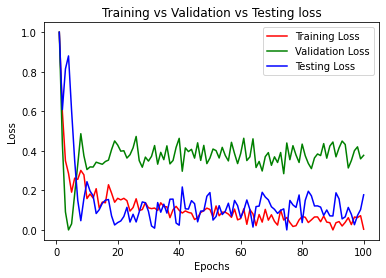

Accuracy = 0.77
Accuracy = 0.80


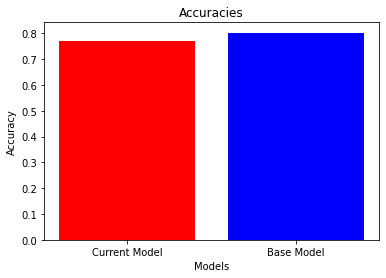

In [436]:
# Base model - SELU Activation Function
class NeuralNetworkReArch(nn.Module):
    def __init__(self, dropout, activationFunc):
        super().__init__()
        self.linear = nn.Sequential(
            nn.Linear(7, 128),
            activationFunc,
            nn.Dropout(dropout),
            nn.Linear(128, 64),
            activationFunc,
            nn.Dropout(dropout),
            nn.Linear(64, 32),
            activationFunc,
            nn.Dropout(dropout),
            nn.Linear(32, 1)
        )
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.linear(x)
        x = self.sigmoid(x)
        return x
    
# NN Model
# Base Model = NeuralNetworkInit3
modelNN4 = NeuralNetworkReArch(dropout=0.2, activationFunc=nn.SELU())

# Loss function and Optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(modelNN4.parameters(), lr=0.001)

# Epochs and batch size
epochs = 100
batchSize = 16

modelTraining(epochs, batchSize, criterion, optimizer, modelNN4)

# Performance Evaluation
modelNN4.eval()
hyperActivtionFunc3.eval()

# Forward pass disabling Backward propagation
with torch.no_grad():
    outputs = modelNN4(X_test_tensor)
    y_test_pred_cur = (outputs >= 0.5)
    y_test_pred_cur = y_test_pred_cur.float() # Sets False->0 and True->1

    outputs_base = hyperActivtionFunc3(X_test_tensor)
    y_test_pred_base = (outputs_base >= 0.5)
    y_test_pred_base = y_test_pred_base.float() # Sets False->0 and True->1


# Accuracy currentmodel
metric_cur = BinaryAccuracy()
test_accuracy_cur = metric_cur(y_test_pred_cur, y_test_tensor)
print(f"Accuracy = {test_accuracy_cur:.2f}")

# Accuracy Base model
metric_base = BinaryAccuracy()
test_accuracy_base = metric_base(y_test_pred_base, y_test_tensor)
print(f"Accuracy = {test_accuracy_base:.2f}")

# Plot the Accuracies
labels = ['Current Model', 'Base Model']
accuracies = [test_accuracy_cur, test_accuracy_base]
plt.bar(labels, accuracies, color=['red', 'blue'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracies')
plt.show()

### Models with weights that generate the best results 

In [437]:
# Save model with weights
torch.save(model_I.state_dict(), 'ngupta22_pandey7_assignment2_part_1.h5')
torch.save(modelNN1.state_dict(), 'ngupta22_pandey7_assignment2_part_2.h5')